# Redes neuronales artificiales
Programar una red neuronal no es dificil si se sabe programar, lo más aparatosa es hacerla flexible con distintos optimizadores, funciones de activación, os animo a hacerlo. Vemos un ejemplo de lo que haría una neurona con distintas funciones de activación: 

In [2]:
# Ejemplo del calculo que se hace en una neurona
import numpy as np

# definimos funcion de activación
def stepFunc(s, theta=1):
    m = s.size
    pred = np.zeros(m)
    for i in range (m):
        if s> theta:
            pred[i] = 1.
        if s <= theta:
            pred[i] = 0.
    return pred
# definimos otro ejemplo de función de activación
def hypertan(s=0.0):
    return np.tanh(s)

def neuron(func,W,X):
    s= np.sum(W*X) # W*X multiplica elemento a elemento los vectores = w1*x1+w2*x2
    pred = func(s)
    return pred


En cada neurona haría este cálculo:

In [3]:
x1 = 0.9; x2 = 2.3
X=[x1,x2]
X = np.column_stack((x1,x2))
w1=1;w2=1
W =[w1,w2]
pred = neuron(hypertan,W,X) # escojo función de activación
pred

0.9966823978396512

El programa entero es más complicado pero se puede hacer. Hay varios paquetes con redes neuronales implementadas, el más en boga es `keras` por sus librerías de *deep learning*, pero para redes neuronales normales `sklearn` es muy sencillo. 

# Clasificación
Vamos a ver un ejemplo de classifcación con unos puntos 2D que pertenecen a dos distribuciones distintas, los de la primera le llamamos que son de la clase 0 y los de la seguna clase 1:

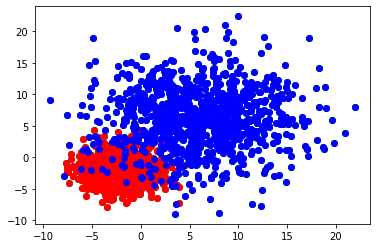

In [5]:
# Cargamos los datos 
data=np.loadtxt('ClassificationExample.txt')
X=data[:,1:]
y=data[:,0]  # la clase a la que pertenecen 0 clase= region roja , 1 clase = región azul

import matplotlib.pyplot as plt
colors = ['red', 'blue']
plt.scatter(X[:,0], X[:,1], c='g')
plt.scatter(X[y==1,0], X[y==1,1], c=colors[0]) # puedo escojer unos X que cumplan cierta condición
plt.scatter(X[y==0,0], X[y==0,1], c=colors[1])


Como **Python** está pensado para vagos :) usamos algunas de las funciones para dividir el data set. Pero vigilemos que no nos haga "tontos". 

In [6]:
# 2 funciones de esas muy simples que python nos hace
from sklearn.model_selection import train_test_split  # dividir training set entre set de train y de validación
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y)   # Xtrain=X[0:ntrain];X_test[ntrain:],...

# normalizamos inputs   (x-<x>)/sigma
scaler = StandardScaler()
scaler.fit(X_train)   # en scaler ahora tengo la media y la sigma guardada de cada elemento en X_train
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# luego hay que hacer la inversa! Comprobar como va de distinto si lo normalizo o no, para el vino es crucial! 

Para classificar usaremos una red específica para eso `MLPClassifier`. Eso quiere decir que: 
1) que la **loss function** por default será la cross entropy o alguna adaptada a ese tipo de problema

2) no dará como salida valores entre 0 

3) El objeto tendrá funcionalidades típicas de los problemas de clasificación como calcular los TP, FP, etc.

Siempre que vayamos a usar una función nueva vemos el `help` para saber qué parámetros hay que poner y como:

In [8]:
from sklearn.neural_network import MLPClassifier
help (MLPClassifier)


Help on class MLPClassifier in module sklearn.neural_network._multilayer_perceptron:

class MLPClassifier(sklearn.base.ClassifierMixin, BaseMultilayerPerceptron)
 |  MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
 |  
 |  Multi-layer Perceptron classifier.
 |  
 |  This model optimizes the log-loss function using LBFGS or stochastic
 |  gradient descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'identity

En hidden layer sizes me dice que ponga las neuronas en las **capas ocultas**, tantas como capas haya en forma de tupla. Es decir que no tengo que poner el tamaño de la capa de inputs ni de la de los outputs. 

In [9]:
# definimos numero de capas ocultas y de hidden nodes, función de activación
# en este caso 2 capas una con 2 neuronas y otra con 5, función de activación tanh
mlp = MLPClassifier(hidden_layer_sizes=(2,5),activation='tanh',max_iter=500,batch_size=50,verbose=True) # batch_size default depending on minimizer

Una vez defino mi función busco los parámetros (los pesos) con un ajuste de esa función con los datos:

In [10]:
# Entreno con los valores que tengo en el train
# en mlp he definido mi ecuacion  y=tanh(sum(xw)+...)
# en fit hago el ajuste al igual que polyfit me hacía
mlp.fit(X_train,y_train)

Iteration 1, loss = 0.83468020
Iteration 2, loss = 0.78184874
Iteration 3, loss = 0.72904490
Iteration 4, loss = 0.67699524
Iteration 5, loss = 0.62699941
Iteration 6, loss = 0.57964266
Iteration 7, loss = 0.53508183
Iteration 8, loss = 0.49450607
Iteration 9, loss = 0.45633903
Iteration 10, loss = 0.42169019
Iteration 11, loss = 0.39017821
Iteration 12, loss = 0.36140431
Iteration 13, loss = 0.33565164
Iteration 14, loss = 0.31236474
Iteration 15, loss = 0.29163933
Iteration 16, loss = 0.27308732
Iteration 17, loss = 0.25664816
Iteration 18, loss = 0.24217159
Iteration 19, loss = 0.22937035
Iteration 20, loss = 0.21830685
Iteration 21, loss = 0.20849843
Iteration 22, loss = 0.20007628
Iteration 23, loss = 0.19262460
Iteration 24, loss = 0.18619576
Iteration 25, loss = 0.18051831
Iteration 26, loss = 0.17552828
Iteration 27, loss = 0.17121973
Iteration 28, loss = 0.16737868
Iteration 29, loss = 0.16405011
Iteration 30, loss = 0.16102255
Iteration 31, loss = 0.15838144
Iteration 32, los

MLPClassifier(activation='tanh', batch_size=50, hidden_layer_sizes=(2, 5),
              max_iter=500, verbose=True)

Miro si ha convergido la **loss function**

Text(0,0.5,'loss function')

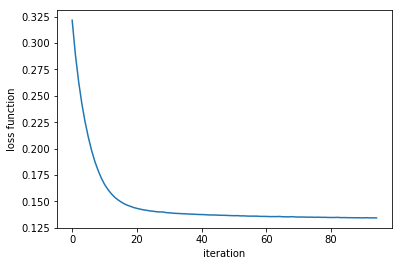

In [19]:
import matplotlib.pyplot as pl
pl.plot(mlp.loss_curve_)  # mlp.loss_curve nos da una idea de como converge el training set
pl.xlabel('iteration')
pl.ylabel('loss function')





Ahora ya puedo predecir con cualquier valor que no he entrenado. Lo hago con el set de validación:

In [19]:
predictions = mlp.predict(X_test)


Compruebo que lo ha hecho bien. Usamos la confusion matrix $C_{ij}$, que nos dice los aciertos en cada clase y los falsos positivos por columnas: $C_{ii}$ true positives, $C_{ij}$ falso positivo detectado en la clase j que eran de la clase i. 

In [20]:
from sklearn.metrics import confusion_matrix
# comparamos los datos del test (lo que no hemos usado para el training) con las predicciones
confusion_matrix(y_test,predictions)  

array([[240,  15],
       [  7, 238]])

In [34]:
# C_00 --> TP detectado como clase 0 y es de la clase 0
# C_00 --> FP detectado como clase 1 que son de la clase 0
# C_10 --> FP detectado como clase 0 que son de la clase 1
# C_11 --> TP detectado como clase 1 y es de la clase 1

En problemas de clasificación hay algunas cantidads importantes:

**Precision** nos dice que proporción de las detecctiones de la red es correcto. Nos da cuenta de lo preciso que es el resultado, si la precisión es alta me creo los resultados de la red. 

$\frac{TP}{TP + FP}$

**recall** nos dice que proporción del total de una clase ha sido detectado correctamente. Me dice si me dejo cosas por detectar. 

$\frac{TP}{TP + FN}$

**f1-score** que es la media armónica de las 2

$2\frac{preciasion\;x\; recall}{precision\;+\;recall}$

En realidad, para decir si un objeto pertenece a una clase o no, ponemos un *threshold*, si la red me da p > 0.7 le acepto en la clase si no no. Jugando con este threshold puedo aumentar o reducir las cantidades arriba. 

Si nos fijamos predictions tiene valores entre 0 y 1

In [22]:
predictions

array([0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 0.

Esto es porque ha aplicado en *threshold* de 0.5. Si queremos obtener los resultados de la red sin ese filtro, podemos predecir con `predict_proba`

In [23]:
mlp.predict_proba(X_test)

array([[0.99812972, 0.00187028],
       [0.99810976, 0.00189024],
       [0.02652515, 0.97347485],
       [0.99563128, 0.00436872],
       [0.99659984, 0.00340016],
       [0.93134247, 0.06865753],
       [0.0204569 , 0.9795431 ],
       [0.02141723, 0.97858277],
       [0.9977537 , 0.0022463 ],
       [0.01721746, 0.98278254],
       [0.02262432, 0.97737568],
       [0.0186836 , 0.9813164 ],
       [0.99806819, 0.00193181],
       [0.99801711, 0.00198289],
       [0.99809864, 0.00190136],
       [0.03507839, 0.96492161],
       [0.02179055, 0.97820945],
       [0.01796268, 0.98203732],
       [0.99366913, 0.00633087],
       [0.02406905, 0.97593095],
       [0.99787566, 0.00212434],
       [0.9981264 , 0.0018736 ],
       [0.99775057, 0.00224943],
       [0.12480995, 0.87519005],
       [0.99810629, 0.00189371],
       [0.70790927, 0.29209073],
       [0.01994606, 0.98005394],
       [0.99811314, 0.00188686],
       [0.78880296, 0.21119704],
       [0.97279949, 0.02720051],
       [0.

Y entonces dediciríamos nosotros cuando nos quedamos con una clase o no. Por ejemplo si decimos que un punto pertenece a una clase si p > 0.9, seremos muy precisos pero perderemos muchos valores (p>0.7,...) y al revés si nos quedamos con el 0.5, puede que dejemos pasar cosas confusas, que tenían el 0.51 para la clase 1 y 0.49 a la clase 2 y aunque mejoramos el *recall* perdemos precisión. Dependiendo el problema nos interesará más una cosa que otra. 

Calculamos la precision y el recall usando `clasification_report` pero otra vez son cálculos simples. 

In [25]:
from sklearn.metrics import classification_report
# F1 score es una mezcla de la precision y el recall 
# F1 = 2 * (precision * recall) / (precision + recall)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96       255
         1.0       0.94      0.97      0.96       245

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



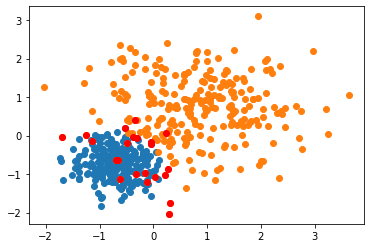

In [28]:
# Hacemos plot de nuestras predicciones y marcamos en rojo los puntos que no hemos clasificado bien

plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1])
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1])
plt.scatter(X_test[(y_test==1) & (predictions==0),0], 
            X_test[(y_test==1) & (predictions==0),1], 
            c='r')
plt.scatter(X_test[(y_test==0) & (predictions==1),0], 
            X_test[(y_test==0) & (predictions==1),1], 
            c='r');
# mal clasificados del test en rojo

## Ejercicios

1. Comprobad que los números del clasificacion report son correctos usando los valores de la confusión matriz. 

In [35]:
# código

2. Cambiad las asignaciones a las clases usando un par de threshold distinto  0.7 y 0.9 por ejemplo y calculad la matriz de confusion, la precision, el recall y mirad el plot. 

In [36]:
# código

3. Tenemos un set de datos con las propiedades de varios vinos y de qué cultivador son (wine.data). Tenéis que crear un modelo entrenando una red neuronal que te clasifique los vinos según su cultivador. Seguid los mismo paso que arriba pero tendréis que cambiar el número de clases por el número de cultivadores. 

Probad distintos modelos y quedaros con el que os de mejor. Pensad también si queréis cambiar el *threshold* para decidir si lo contamos como clasificado en una clase o no.  (datos obtenidos de https://archive.ics.uci.edu/ml/datasets/Wine)

In [27]:
# código